# TF的处理结构
![处理结构](https://www.tensorflow.org/images/tensors_flowing.gif)

## Tensor 张量意义
**张量（Tensor):**

* 张量有多种. 零阶张量为 纯量或标量 (scalar) 也就是一个数值. 比如 [1]
* 一阶张量为 向量 (vector), 比如 一维的 [1, 2, 3]
* 二阶张量为 矩阵 (matrix), 比如 二维的 [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
* 以此类推, 还有 三阶 三维的 …

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
#create data
x_data = np.random.rand(100).astype(np.float32) #tensor的变量多为np.float32
y_data = x_data*0.1+0.3
#create tensorflow structure start
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0)) 
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5) #学习率 alpha
train = optimizer.minimize(loss)

init=tf.global_variables_initializer()
#structure finish
sess = tf.Session()
sess.run(init) #Very Important

for step in range(201):
    sess.run(train)
    if step%20==0:
        print(step,sess.run(Weights),sess.run(biases))


0 [ 0.58736986] [ 0.03585268]
20 [ 0.20835146] [ 0.24031886]
40 [ 0.12417874] [ 0.2866821]
60 [ 0.10539552] [ 0.29702809]
80 [ 0.10120403] [ 0.29933682]
100 [ 0.1002687] [ 0.29985201]
120 [ 0.10005996] [ 0.29996699]
140 [ 0.10001339] [ 0.29999265]
160 [ 0.10000301] [ 0.29999834]
180 [ 0.10000068] [ 0.29999962]
200 [ 0.10000015] [ 0.29999992]


# Session 会话控制
Session 是 Tensorflow 为了控制,和输出文件的执行的语句. 运行 session.run() 可以获得你要得知的运算结果, 或者是你所要运算的部分.
相当于一个指针


In [2]:
mat1 = tf.constant([[3,3]])
mat2 = tf.constant([[2],
                    [2]])
product = tf.matmul(mat1,mat2) #matrix multiply  np.dot(mat1,mat2)

#method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()
#method 2
with tf.Session() as sess: #相当于c++ 里面{....}的结构 自动析构sess
    result2 = sess.run(product)
    print(result2)

[[12]]
[[12]]


# Variable 变量
* 在 Tensorflow 中，定义了某字符串是变量，它才是变量，这一点是与 Python 所不同的。
定义语法： state = tf.Variable()
* 如果你在 Tensorflow 中设定了变量，那么初始化变量是最重要的！！所以定义了变量以后, 一定要定义 init = *tf.global_variables_initializer()* .
* 到这里变量还是没有被激活，需要再在 sess 里, sess.run(init) , 激活 init 这一步.
注意：直接 print(state) 不起作用！！
一定要把 sess 的指针指向 state 再进行 print 才能得到想要的结果！

In [3]:
state = tf.Variable(0,name='counter')
# print(state.name)
one = tf.constant(1)
new_value = tf.add(state,one)
update = tf.assign(state,new_value)
# print(state)
init = tf.global_variables_initializer() #must have if define variables
sess = tf.Session()
sess.run(init)
for _ in range(3):
    sess.run(update)
    print(sess.run(state))

1
2
3


# Placeholder 传入值
* placeholder 是 Tensorflow 中的占位符，暂时储存变量.
* Tensorflow 如果想要从外部传入data, 那就需要用到 tf.placeholder(), 然后以这种形式传输数据
  **sess.run(\*\*\*, feed_dict={input: \*\*})**.

In [4]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)
print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))


[ 14.]


# 激励函数 Activation Function
Tensorflow 提供的一些[激励函数](https://www.tensorflow.org/api_guides/python/nn) 

# 添加层 def add_layer()

In [5]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1) 
    #在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# 建造神经网络


In [6]:
x_data = np.linspace(-1,1,300).reshape((300,1))
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])
#hidden layer 
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
#prediction layer
prediction =add_layer(l1,10,1,activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),
                                    reduction_indices=[1]))
# reduction_indices=[1] 按行求和
# reduction_indices=[0] 按列求和
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.066338
0.00524319
0.0044135
0.00411754
0.00390686
0.00373257
0.0036266
0.00354994
0.0034934
0.00343632
0.00338899
0.00334603
0.00331493
0.00329227
0.00328113
0.00327381
0.00326375
0.00325632
0.00325011
0.00324457


# 结果可视化
may need run .py

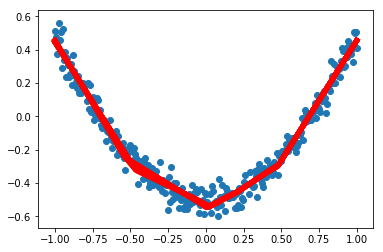

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(x_data,y_data)
# plt.ion() #plt.ion()用于连续显示
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        try:
            ax.line.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
#         plt.pause(0.1)
plt.show()